#### Lesson 3: Intermediate Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

##### Drills

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

    1. Choose one variable and plot that variable four different ways.
    2. Choose two continuous variables, and plot them three different ways.
    3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [2]:
# taken from Kaggle superheros datasets
data = pd.read_csv('Data/charcters_stats.csv')

In [4]:
data.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


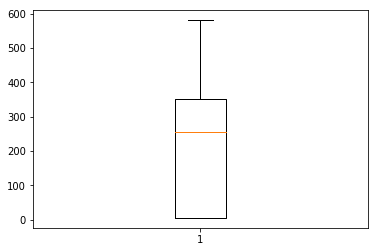

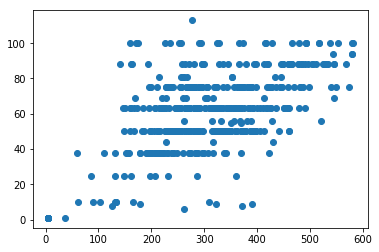

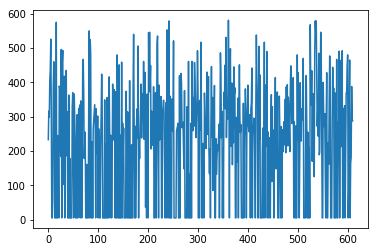

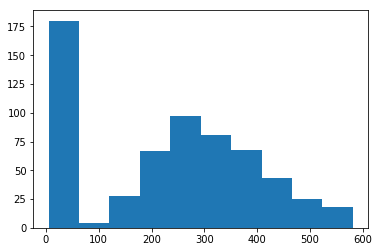

In [5]:
#1. Choose one variable and plot that variable four different ways
plt.boxplot(data['Total'])
plt.show()

plt.scatter(data['Total'], data['Intelligence'])
plt.show()

plt.plot(data['Total'])
plt.show()

plt.hist(data['Total'])
plt.show()

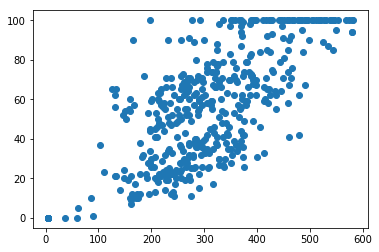

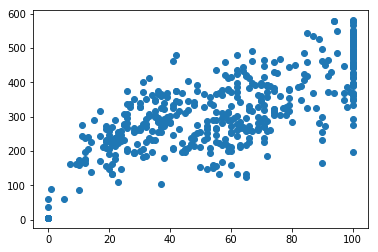

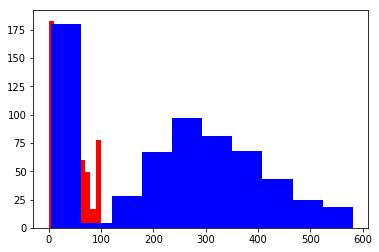

In [6]:
#2. Choose two continuous variables, and plot them three different ways.
plt.scatter(data['Total'], data['Power'])
plt.show()

plt.scatter(data['Power'], data['Total'])
plt.show()

plt.hist(data['Power'], color='red')
plt.hist(data['Total'], color='blue')
plt.show()

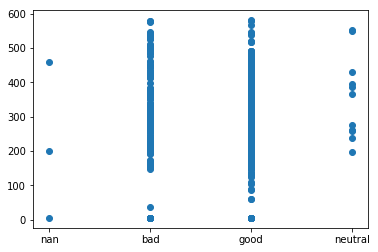

In [12]:
#3. Choose one continuous variable and one categorical variable, and plot them six different ways.
plt.scatter(data['Alignment'], data['Total'])
plt.show()

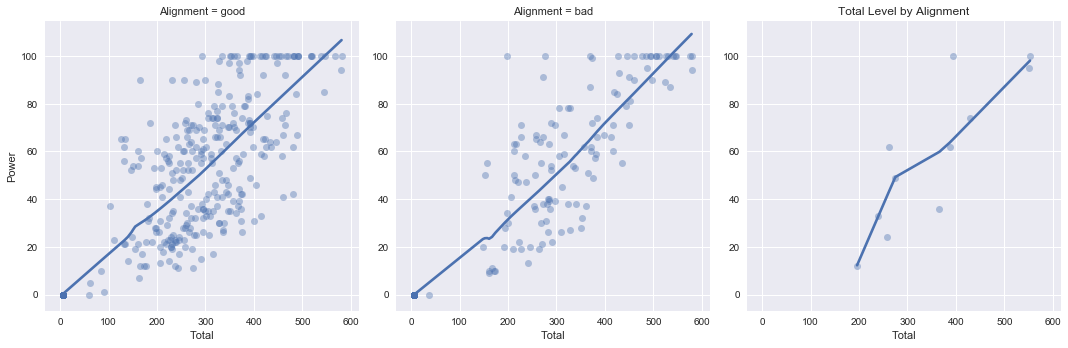

In [27]:
g = sns.lmplot(y='Power', 
               x='Total',
               data=data,
               col='Alignment',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Power")
g.set_xlabels("Total")
plt.title('Total Level by Alignment')
plt.show()

In [8]:
# breaking down dataset by Alignment
good = data[data['Alignment']=='good']
bad = data[data['Alignment']=='bad']
neutral = data[data['Alignment']=='neutral']

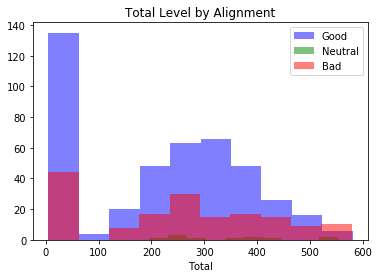

In [11]:
plt.hist(good['Total'], color='blue', alpha=.5,label='Good')
plt.hist(neutral['Total'], color='green', alpha=.5,label='Neutral')  
plt.hist(bad['Total'], color='red', alpha=.5,label='Bad')
plt.xlabel('Total')
plt.legend(loc='upper right')
plt.title('Total Level by Alignment')
plt.show()

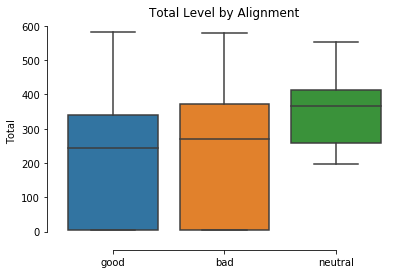

In [14]:
ax = sns.boxplot(x='Alignment',y='Total',data=data)  
plt.title('Total Level by Alignment')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Total')

plt.show()

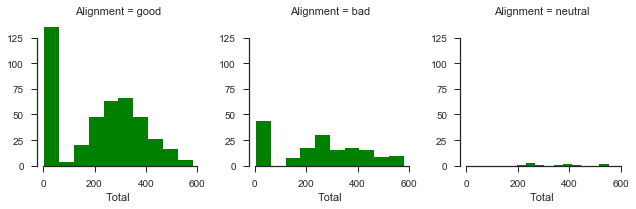

In [17]:
sns.set(style="ticks")
g = sns.FacetGrid(data, col="Alignment")
plt.title('Total Level by Alignment')
g.map(plt.hist, "Total", color="green",  lw=0)
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Total')
sns.despine(trim=True)
plt.show()

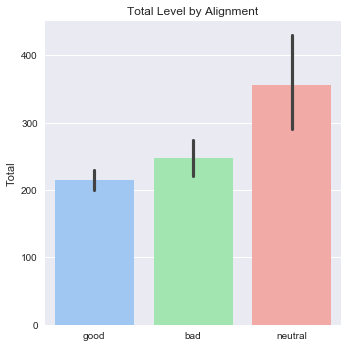

In [25]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Alignment", y="Total",  data=data,
                   size=5, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("")
plt.title('Total Level by Alignment')
plt.show()

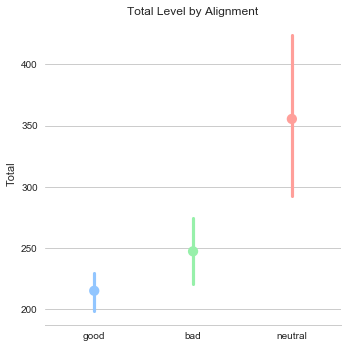

In [23]:
sns.set(style="whitegrid")

g = sns.factorplot(x="Alignment", y="Total",  data=data,
                   size=5, kind="point", palette="pastel", ci=95, dodge=True, join=False)
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("")
plt.title('Total Level by Alignment')
plt.show()

#### Challenge: Data cleaning & validation

Determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal .

In [2]:
wellcome_data = pd.read_csv('Data/WELLCOME_APCspend2013_forThinkful.csv', engine='python')

In [3]:
wellcome_data.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
wellcome_data['Journal title'].value_counts()

PLoS One                                                            92
PLoS ONE                                                            62
Journal of Biological Chemistry                                     48
Nucleic Acids Research                                              21
Proceedings of the National Academy of Sciences                     19
PLoS Neglected Tropical Diseases                                    18
Human Molecular Genetics                                            18
Nature Communications                                               17
Neuroimage                                                          15
PLoS Genetics                                                       15
PLoS Pathogens                                                      15
Brain                                                               14
NeuroImage                                                          14
BMC Public Health                                                   14
PLOS O

In [5]:
# putting the journal titles in lowercase letters
wellcome_data['Journal title'] = wellcome_data['Journal title'].str.lower()

In [6]:
# 5 most common journal titles
wellcome_data['Journal title'].value_counts().head()

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos genetics                       24
plos pathogens                      24
Name: Journal title, dtype: int64

In [7]:
# removing monetary units
wellcome_data['Cost'] = wellcome_data['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£','')
wellcome_data['Cost'] = wellcome_data['Cost'].str.replace('$', '')

In [8]:
# changing the column's datatype
wellcome_data['Cost'] = pd.to_numeric(wellcome_data['Cost'])

In [9]:
# making a list of all the journals
journals = wellcome_data['Journal title'].unique()

In [10]:
# function to deliver stats for each journal
def stats(journals):
    for j in journals:
        df = wellcome_data[wellcome_data['Journal title']== j]
        print(j, '\n')
        print('Mean = ', df['Cost'].mean())
        print('Median = ', df['Cost'].median())
        print('Standard Deviation = ', df['Cost'].std(),'\n')    
    return 

In [11]:
# putting list of journals through function
stats(journals)

psychological medicine 

Mean =  1580.4
Median =  2034.0
Standard Deviation =  889.2619411624452 

biomacromolecules 

Mean =  2381.04
Median =  2381.04
Standard Deviation =  nan 

j med chem 

Mean =  656.0999999999999
Median =  656.0999999999999
Standard Deviation =  19.148451634531735 

j org chem 

Mean =  685.88
Median =  685.88
Standard Deviation =  nan 

journal of medicinal chemistry 

Mean =  1222.3633333333332
Median =  1146.96
Standard Deviation =  644.0811727000461 

journal of proteome research 

Mean =  1844.915
Median =  1844.915
Standard Deviation =  739.6831905958115 

mol pharm 

Mean =  649.33
Median =  649.33
Standard Deviation =  nan 

acs chemical biology 

Mean =  1418.1860000000001
Median =  1294.59
Standard Deviation =  507.30956006170436 

journal of chemical information and modeling 

Mean =  1329.69
Median =  1329.69
Standard Deviation =  nan 

biochemistry 

Mean =  665.64
Median =  665.64
Standard Deviation =  nan 

gastroenterology 

Mean =  1233.04
Media


Mean =  1760.3
Median =  1854.0
Standard Deviation =  205.2702365176208 

virology journal 

Mean =  1242.0
Median =  1242.0
Standard Deviation =  nan 

bmc genomics. 

Mean =  999999.0
Median =  999999.0
Standard Deviation =  nan 

bmc infectious diseases  

Mean =  1280.0
Median =  1280.0
Standard Deviation =  nan 

hum resour health 

Mean =  1525.0
Median =  1525.0
Standard Deviation =  nan 

implement sci. 

Mean =  1345.0
Median =  1345.0
Standard Deviation =  nan 

malaria journal  

Mean =  1235.0
Median =  1235.0
Standard Deviation =  0.0 

parasit vectors. 

Mean =  1200.0
Median =  1200.0
Standard Deviation =  nan 

aids research and therapy 

Mean =  1240.0
Median =  1240.0
Standard Deviation =  nan 

bmc pediatrics 

Mean =  1280.0
Median =  1280.0
Standard Deviation =  nan 

human resources for health 

Mean =  1125.0
Median =  1125.0
Standard Deviation =  nan 

trials  

Mean =  1165.0
Median =  1165.0
Standard Deviation =  nan 

bmc infectious diseases 

Mean =  1455.9

Standard Deviation =  nan 

current opinions in neurobiology 

Mean =  2429.17
Median =  2429.17
Standard Deviation =  nan 

development cell 

Mean =  3630.64
Median =  3630.64
Standard Deviation =  nan 

developmental biology 

Mean =  1981.38
Median =  1981.38
Standard Deviation =  nan 

developmental cognitive neuroscience  

Mean =  2110.6549999999997
Median =  2110.6549999999997
Standard Deviation =  490.15934965070295 

diagnostic microbiology and infectious disease 

Mean =  2252.53
Median =  2252.53
Standard Deviation =  nan 

elsevier 

Mean =  2625.421428571429
Median =  2269.15
Standard Deviation =  964.9475313789271 

endeavour 

Mean =  1517.7150000000001
Median =  1517.7150000000001
Standard Deviation =  1275.6135621927199 

epilepsy research 

Mean =  2483.12
Median =  2483.12
Standard Deviation =  nan 

european journal of cell biology 

Mean =  2228.0
Median =  2228.0
Standard Deviation =  nan 

european journal of medical genetics 

Mean =  2374.79
Median =  2374.79



Mean =  2376.6025
Median =  2385.69
Standard Deviation =  32.37109139855096 

parkinsonism and related disorders 

Mean =  2251.56
Median =  2251.56
Standard Deviation =  nan 

parsitology 

Mean =  2058.96
Median =  2058.96
Standard Deviation =  nan 

personality and individual differences 

Mean =  2357.04
Median =  2357.04
Standard Deviation =  nan 

preventive medicine 

Mean =  1799.4350000000002
Median =  1797.19
Standard Deviation =  651.3164074011955 

protein expr purif. 

Mean =  1938.38
Median =  1938.38
Standard Deviation =  nan 

protist 

Mean =  2177.87
Median =  2177.87
Standard Deviation =  nan 

pulmonary pharmacology & therapeutics 

Mean =  2421.77
Median =  2421.77
Standard Deviation =  nan 

research in veterinary science 

Mean =  2476.85
Median =  2476.85
Standard Deviation =  nan 

schizophrenia research 

Mean =  2222.09
Median =  2222.09
Standard Deviation =  0.0 

seizure 

Mean =  2369.7
Median =  2369.7
Standard Deviation =  nan 

seminars in oncology 

M

Mean =  2971.955
Median =  2965.73
Standard Deviation =  335.0716755660894 

journal of neurology & translational neuroscience 

Mean =  159.91
Median =  159.91
Standard Deviation =  nan 

nephron physiology 

Mean =  2110.15
Median =  2110.15
Standard Deviation =  nan 

neurodegenerative diseases 

Mean =  2061.82
Median =  2061.82
Standard Deviation =  nan 

neuroepidemiology 

Mean =  2075.98
Median =  2075.98
Standard Deviation =  nan 

neuropsychobiology 

Mean =  2533.25
Median =  2533.25
Standard Deviation =  nan 

respiration 

Mean =  2134.67
Median =  2134.67
Standard Deviation =  nan 

autophagy 

Mean =  601.1
Median =  601.1
Standard Deviation =  nan 

cell adhesion and migration 

Mean =  321.46
Median =  321.46
Standard Deviation =  nan 

cell cycle 

Mean =  745.7433333333333
Median =  773.3050000000001
Standard Deviation =  72.62757621363023 

channels 

Mean =  159.74
Median =  159.74
Standard Deviation =  nan 

epigenetics 

Mean =  490.485
Median =  490.485
Standard


mol biol and evolution 

Mean =  2040.0
Median =  2040.0
Standard Deviation =  nan 

nephrology dialysis and transplantation 

Mean =  2040.0
Median =  2040.0
Standard Deviation =  nan 

nephrology dialysis transplantation 

Mean =  1700.0
Median =  1700.0
Standard Deviation =  nan 

nucleic acid research 

Mean =  1278.0
Median =  1420.0
Standard Deviation =  511.9882811158865 

nucleic acids research  

Mean =  1065.0
Median =  1065.0
Standard Deviation =  502.04581464244876 

oxford journals 

Mean =  1700.0
Median =  1700.0
Standard Deviation =  nan 

oxford university press 

Mean =  999999.0
Median =  999999.0
Standard Deviation =  nan 

protein engineering, design and selection ( 

Mean =  2040.0
Median =  2040.0
Standard Deviation =  nan 

qjm: an international journal of medicine 

Mean =  2050.0
Median =  2050.0
Standard Deviation =  494.9747468305833 

the journal of infectious diseases 

Mean =  2040.0
Median =  2040.0
Standard Deviation =  nan 

clinical infectious diseas

Standard Deviation =  nan 

cognitive processing 

Mean =  1903.03
Median =  1903.03
Standard Deviation =  nan 

cognitive therapy and research 

Mean =  1989.65
Median =  1989.65
Standard Deviation =  nan 

current atherosclerosis reports 

Mean =  2229.325
Median =  2229.325
Standard Deviation =  116.26956803050389 

current obstetrics and gynecology reports  

Mean =  2321.55
Median =  2321.55
Standard Deviation =  nan 

development genes and evolution 

Mean =  2230.1
Median =  2230.1
Standard Deviation =  nan 

diabetologia 

Mean =  2272.1200000000003
Median =  2289.06
Standard Deviation =  54.1549591450313 

european child and adolescent psychiatry 

Mean =  2331.95
Median =  2331.95
Standard Deviation =  nan 

european child and adolescent psychiatty 

Mean =  2285.92
Median =  2285.92
Standard Deviation =  nan 

european journal of clinical pharmacology 

Mean =  1632.89
Median =  1632.89
Standard Deviation =  nan 

european journal of epidemiology 

Mean =  2060.28
Median =  

european journal of neuroscience 

Mean =  1500.0
Median =  1500.0
Standard Deviation =  nan 

evolution 

Mean =  2279.37
Median =  2279.37
Standard Deviation =  134.5624204598001 

experimental physiology 

Mean =  1894.94
Median =  1894.94
Standard Deviation =  nan 

febs j. 

Mean =  2246.63
Median =  2246.63
Standard Deviation =  0.5939696961968028 

febs journal 

Mean =  1941.2275
Median =  1917.455
Standard Deviation =  510.962451678203 

fems microbiology letters 

Mean =  2151.655
Median =  2141.93
Standard Deviation =  180.69631567909735 

genes brain behaviour 

Mean =  2381.935
Median =  2381.935
Standard Deviation =  37.35645125008526 

genesis: journal of genetics 

Mean =  2376.4
Median =  2376.4
Standard Deviation =  nan 

glia 

Mean =  2080.97
Median =  2080.97
Standard Deviation =  146.0175503150219 

hbm jnl human brain mapping 

Mean =  999999.0
Median =  999999.0
Standard Deviation =  nan 

hepatology 

Mean =  1900.43625
Median =  1926.855
Standard Deviation =  